# Project: Wrangling and Analyze Data

#### Author: Precious Iyekeoretin

* **Step 1. Data Gathering**
* **Step 2. Assessing Data**
* **Step 3. Cleaning Data**
* **Step 4. Storing Data**
* **Step 5. Analysing and Visualizing Data**


In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Importing the twitter_archive_enhanced dataset
twitter = pd.read_csv("twitter-archive-enhanced.csv", sep=",")
twitter.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Importing the image_predictions dataset
image = pd.read_csv("image-predictions.tsv", sep="\t")
image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Using the requests and json library to import additional data (tweet_json.txt)

In [4]:
# The Dummy twitter api extraction code
# due to absent of the twitter api credential i replace the pass to break, to stop the loop
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            break # due to absent of the twitter api credential i reply the pass to break, to stop the loop
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
0.1623093460000291
{892420643555336193: TweepError([{'code': 89, 'message': 'Invalid or expired token.'}],)}


In [5]:
# scraping the tweet-json.txt
url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
response = requests.get(url)
with open('tweet-json.txt', mode= "wb") as file:
    file.write(response.content)
    

In [6]:
# output the dataset 
tweet = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet.append(json.loads(line))

In [7]:
print(tweet[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [8]:
# converting the tweet-json to pandas DataFrame having Id , retweet count and favorite count
tweet_df = pd.DataFrame(tweet, columns = ["id", "retweet_count", "favorite_count"])
tweet_df.head()


,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### 1. visual assessment to assess the data

In [9]:
# visual assessing of twitter dataset
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
# visual assessing of image dataset
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
# saving the tweet df as csv file and visual assessing of retweet dataset 
tweet_df.to_csv("retweet.csv", index=False)
retweet = pd.read_csv("retweet.csv")
retweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### 2. programmatic assessement to assess the data.
* **A. For twitter_archive_enhanced dataset**

In [12]:
# checking the structure of the dataset
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
#checking for 5 records in the dataset
twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1272,709225125749587968,NaN,NaN,2016-03-14 03:50:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walker. He's a Butternut Khalifa. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709225125...,11,10,Walker,None,None,None,None
760,778383385161035776,NaN,NaN,2016-09-21 00:00:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778383385...,13,10,Nala,None,None,None,None
2159,669571471778410496,NaN,NaN,2015-11-25 17:40:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's had 13 DUIs. 7/10 that's t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669571471...,7,10,Keith,None,None,None,None
1639,684177701129875456,NaN,NaN,2016-01-05 01:00:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kulet. She's very proud of the flower ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,None,None,None,None
1181,719332531645071360,NaN,NaN,2016-04-11 01:13:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pippa. She managed to start the car bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719332531...,11,10,Pippa,None,None,None,None


In [14]:
# looking for non-null values in the in_reply_to_status_id, in_reply_to_user_id,
# retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns
(twitter[(twitter['in_reply_to_status_id'].notnull()) | (twitter['in_reply_to_user_id'].notnull()) |
(twitter['retweeted_status_id'].notnull()) | (twitter['retweeted_status_user_id'].notnull()) |
(twitter['retweeted_status_timestamp'].notnull())].shape[0] > 0)


True

In [15]:
# showing columns with nan values
twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
# Checking for invalid names in the name column
if (twitter[twitter['name'].str.match('^[a-z]+')].shape[0]>0):
    print("There are invalid names present in the dataset(such as a, an).")
else:
    print("All names in the dataset are valid.")


There are invalid names present in the dataset(such as a, an).


In [17]:
# quick statistical description of the dataset
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# checking for duplicated records
twitter.duplicated().sum()

0

In [19]:
# checking for unique values in the dataset
twitter.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [20]:
# checking for the datatype
twitter.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [21]:
# checking for a "none" 
twitter[['doggo', 'floofer', 'pupper', 'puppo']].eq('None').any().any()


True

In [22]:
# rating_numerator have a Zero value
twitter["rating_numerator"].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [23]:
# rating_denominator have a Zero value
twitter["rating_denominator"].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [24]:
# checking the text column
twitter["text"].value_counts()

This is Alexander Hamilpup. He was one of the many stars in this year's Puppy Bowl. He just hopes both teams had fun. 12/10 https://t.co/JcTuUcyYNS                    1
This is Ralphus. He's powering up. Attempting maximum borkdrive. 13/10 inspirational af https://t.co/YnYAFCTTiK                                                        1
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R                             1
RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https://t.c…                           1
There's a lot going on here but in my honest opinion every dog pictured is pretty fabulous. 10/10 for all. Good dogs https://t.co/VvYVbsi6c3                           1
Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR                         

* **B. For image_predictions dataset**

In [25]:
# checking the structure of the dataset
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
#checking for 5 records in the dataset
image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1800,831911600680497154,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4,bloodhound,0.777562,True,Great_Dane,0.047418,True,Leonberg,0.017943,True
1013,709556954897764353,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,2,golden_retriever,0.790026,True,kuvasz,0.105031,True,Labrador_retriever,0.087051,True
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False
197,669603084620980224,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,1,Maltese_dog,0.659619,True,Tibetan_terrier,0.193539,True,Shih-Tzu,0.039327,True
1329,757596066325864448,https://pbs.twimg.com/media/CoOFmk3WEAAG6ql.jpg,1,doormat,0.845256,False,wallet,0.095718,False,wool,0.026072,False


In [27]:
image["p1"].head(10)

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
5      Bernese_mountain_dog
6                box_turtle
7                      chow
8             shopping_cart
9          miniature_poodle
Name: p1, dtype: object

In [28]:
# showing columns with nan values
image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [29]:
# quick statistical description of the dataset
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
# checking for duplicated records
image.duplicated().sum()

0

In [31]:
# checking for unique values in the dataset
image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [32]:
# checking for the datatype
image.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

* **C. For tweet-json dataset**

In [33]:
# checking for the datatype
retweet.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

In [34]:
# checking for unique values in the dataset
retweet.nunique()

id                2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [35]:
# checking for duplicated records
retweet.duplicated().sum()

0

In [36]:
# quick statistical description of the dataset
retweet.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [37]:
# showing columns with nan values
retweet.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [38]:
#checking for 5 records in the dataset
retweet.sample(5)

,id,retweet_count,favorite_count
1593,686358356425093120,776,2398
420,821886076407029760,2692,12582
743,780192070812196864,2589,9712
1072,739844404073074688,966,4138
1435,697242256848379904,751,2753


In [39]:
# checking the structure of the dataset
retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
* #### Twitter_archive_enhanced dataset
1. invalid name in the name columns(such as "a", "an").
* #### Twitter_archive_enhanced dataset
2. Removing the link from text column.
* #### Twitter_archive_enhanced dataset
3. invalid datatype of timestamp column to timestamp.
* #### Tweet-json.txt
4. Rename ID to tweet id.
* #### All Dataset 
5. invalid datatype tweet id to object(string).
* #### Tweet-json.txt
6. invalid data in the "retweet_count" and "favorite_count" columns.
* #### image_predictions dataset
7. some people names under the p1 column are lowercase and uppercase.
* #### twitter_archive_enhanced dataset
8. invalid data in "rating_denominator" and "rating_numerator" columns.
* #### twitter_archive_enhanced dataset
9. Remove retweets.. i.e tweets where retweeted_status_id and in_reply_to_status_id is not null.
* #### twitter_archive_enhanced dataset
10. Extracting content from source columns.

### Tidiness issues
* #### twitter_archive_enhanced dataset
1. extract text from the 'doggo', 'floofer', 'pupper', 'puppo' columns to creat new column called "dog type"
2. Merge the 3 dataset by Tweet_id.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [40]:
# Make copies of original pieces of data
original_t=twitter.copy()
original_i=image.copy()
original_r=retweet.copy()

In [41]:
original_t.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [42]:
original_i.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [43]:
original_r.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467


### Issue #1:

#### Define:

* Replacing invalid name with "NaN"

#### Code

In [44]:
# Replace invalid names with NaN
twitter['name'].replace(to_replace='^[a-z]+',value='',inplace=True,regex=True)
twitter['name'].replace(to_replace='None',value=np.nan,inplace=True)

#### Test

In [45]:
twitter['name'].head(10)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
5         NaN
6         Jax
7         NaN
8        Zoey
9      Cassie
Name: name, dtype: object

### Issue #2:

#### Define

* Removing the links from text column

#### Code

In [46]:
# To remove the link from the text column.
def remove_links(text):
    return re.sub(r'https?:\/\/[A-Za-z0-9./]+','', text)
twitter["text"] = twitter["text"].apply(remove_links)

#### Test

In [47]:
twitter["text"].value_counts()

This is Cassie. She steals things. Guilt increases slightly each time. 12/10 would forgive almost immediately                                     1
This is Bella. She's a Genghis Flopped Canuck. Stuck in trash can. 9/10 not to happy about it                                                     1
Here's a helicopter pupper. He takes off at random. H*ckin hard to control. 12/10 rare af                                                         1
Happy New Year from the squad! 13/10 for all                                                                                                      1
Two unbelievably athletic dogs here. Great form. Perfect execution. 10/10 for both                                                                1
This is Cooper. He tries to come across as feisty but it never works for very long. 12/10                                                         1
This is Ralph. He's an interpretive dancer. 10/10                                                               

### Issue #3:

#### Define

* Convert the timestamp column to a datetime datatype

#### Code

In [48]:
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'])

#### Test

In [49]:
twitter['timestamp'].dtype

dtype('<M8[ns]')

### Issue #4:

#### Define

* Renaming id to tweet id

#### Code

In [50]:
retweet = retweet.rename(columns={'id':'tweet_id'})

#### Test

In [51]:
retweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #5:

#### Define

* Coverting datatype tweet id from int to object(string).

#### Code

In [52]:
twitter = twitter.astype({"tweet_id": str})
image = image.astype({"tweet_id": str})
retweet = retweet.astype({"tweet_id": str})


#### Test

In [53]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [54]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [55]:
retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #6:

#### Define

Removing Zero value from "retweet_count" and "favorite_count" columns.

#### Code

In [56]:
retweet = retweet[retweet['retweet_count'] != 0]
retweet = retweet[retweet['favorite_count'] != 0]

#### Test

In [57]:
retweet.describe()

,retweet_count,favorite_count
count,2174.000000,2174.000000
mean,2759.255750,8749.977001
std,4647.291935,12053.865672
min,2.000000,52.000000
25%,608.000000,1916.250000
50%,1342.000000,4053.500000
75%,3220.000000,11110.000000
max,79515.000000,132810.000000


### Issue #7:

#### Define

* Coverting the first letter of the p1, p2, p3 columns to uppercase.

#### Code

In [58]:
image[['p1', 'p2', 'p3']] = image[['p1', 'p2', 'p3']].apply(lambda x: x.str.capitalize())


#### Test

In [59]:
image[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,Collie,Shetland_sheepdog
1,Redbone,Miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,Malinois,Bloodhound
3,Rhodesian_ridgeback,Redbone,Miniature_pinscher
4,Miniature_pinscher,Rottweiler,Doberman


### Issue #8:

#### Define

* Removing zero values from "rating_denominator" and "rating_numerator" columns

#### Code

In [60]:
twitter = twitter[twitter["rating_numerator"] != 0]
twitter = twitter[twitter["rating_denominator"] != 0]

#### Test

In [61]:
twitter[["rating_denominator","rating_numerator"]].describe()

,rating_denominator,rating_numerator
count,2353.000000,2353.000000
mean,10.460263,12.735232
std,6.746079,41.543437
min,2.000000,1.000000
25%,10.000000,10.000000
50%,10.000000,11.000000
75%,10.000000,12.000000
max,170.000000,1776.000000


### Issue #9:

#### Define

* extracting text from the 'doggo', 'floofer', 'pupper', 'puppo' columns to creat new column called "dog type"

#### Code

In [62]:
# Use .str.extract() to extract text from the 'doggo', 'floofer', 'pupper', 'puppo' columns
twitter['dog_type'] = twitter["text"].str.extract("(doggo|floofer|pupper|puppo)")

# Remove None values from the dog_type column
twitter.loc[twitter.dog_type == '', 'dog_type'] = None

#### Test

In [63]:
twitter.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
893,759446261539934208,NaN,NaN,2016-07-30 17:51:13,"<a href=""http://twitter.com/download/iphone"" r...",No no no this is all wrong. The Walmart had to...,NaN,NaN,NaN,https://twitter.com/wsaznews/status/7591675587...,10,10,NaN,None,None,None,None,NaN
1825,676470639084101634,NaN,NaN,2015-12-14 18:35:43,"<a href=""http://twitter.com/download/iphone"" r...",Three generations of pupper. 11/10 for all,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676470639...,11,10,NaN,None,None,pupper,None,pupper
165,860177593139703809,NaN,NaN,2017-05-04 17:01:34,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,7.616730e+17,4.196984e+09,2016-08-05 21:19:27 +0000,https://twitter.com/dog_rates/status/761672994...,10,10,NaN,None,None,None,None,NaN
2185,668986018524233728,NaN,NaN,2015-11-24 02:54:30,"<a href=""http://twitter.com/download/iphone"" r...",This is Ruby. She's a Bimmington Fettuccini. O...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668986018...,9,10,Ruby,None,None,None,None,NaN
1094,736736130620620800,NaN,NaN,2016-05-29 01:49:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Chadrick. He's gnarly af 13/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736736130...,13,10,Chadrick,None,None,None,None,NaN
377,828011680017821696,NaN,NaN,2017-02-04 22:45:42,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brutus and Jersey. They think the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828011680...,11,10,Brutus,None,None,None,None,NaN
2080,670823764196741120,NaN,NaN,2015-11-29 04:37:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He's a man dime. 12/10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670823764...,12,10,Remington,None,None,None,None,NaN
1248,711363825979756544,NaN,NaN,2016-03-20 01:28:47,"<a href=""http://twitter.com/download/iphone"" r...","""Please, no puparazzi"" 11/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/711363825...,11,10,NaN,None,None,None,None,NaN
1192,717790033953034240,NaN,NaN,2016-04-06 19:04:14,"<a href=""http://twitter.com/download/iphone"" r...",Here's a badass mystery pupper. You weren't aw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717790033...,10,10,NaN,None,None,pupper,None,pupper
720,783347506784731136,NaN,NaN,2016-10-04 16:46:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kenny. He just wants to...,6.742918e+17,4.196984e+09,2015-12-08 18:17:56 +0000,https://twitter.com/dog_rates/status/674291837...,11,10,Kenny,None,None,None,None,NaN


### Issue #10:

#### Define

* Deleting retweeted_status_id and in_reply_to_status_id with null values

#### Code

In [67]:
# To remove the retweets
twitter = twitter[twitter.retweeted_status_id.isnull()]
# To remove the replies
twitter = twitter[twitter.in_reply_to_status_id.isnull()]

#### Test

In [68]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2096 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2096 non-null datetime64[ns]
source                        2096 non-null object
text                          2096 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2093 non-null object
rating_numerator              2096 non-null int64
rating_denominator            2096 non-null int64
name                          1494 non-null object
doggo                         2096 non-null object
floofer                       2096 non-null object
pupper                        2096 non-null object
puppo                         2096 non-null object
dog_type                      3

### Issue #11:

#### Define

* extracting content from source columns

#### Code

In [69]:
twitter['source'] = twitter['source'].str.replace('<.*?>','')

#### Test

In [70]:
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


### Issue #12:

#### Define

* Merging the 3 dataset by Tweet_id.

#### Code

In [71]:
merged_df = pd.merge(twitter, retweet, how='left', on='tweet_id')
merged_df = pd.merge(merged_df, image, how='left', on='tweet_id')

#### Test

In [72]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 31 columns):
tweet_id                      2096 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2096 non-null datetime64[ns]
source                        2096 non-null object
text                          2096 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2093 non-null object
rating_numerator              2096 non-null int64
rating_denominator            2096 non-null int64
name                          1494 non-null object
doggo                         2096 non-null object
floofer                       2096 non-null object
pupper                        2096 non-null object
puppo                         2096 non-null object
dog_type                      3

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
merged_df.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. What is the Most popular source of tweets?

In [74]:
sources = twitter['source'].value_counts()
most_popular_source = sources.idxmax()
most_popular_source



'Twitter for iPhone'

2.The Relationship between favorite and retweet counts?

In [75]:
retweet[['favorite_count','retweet_count']].corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.911717
retweet_count,0.911717,1.000000


3.What is the Popularity of various dog types?

In [76]:
dog_type = twitter['dog_type'].value_counts()
dog_type

pupper     240
doggo       80
puppo       29
floofer      4
Name: dog_type, dtype: int64

### Visualization

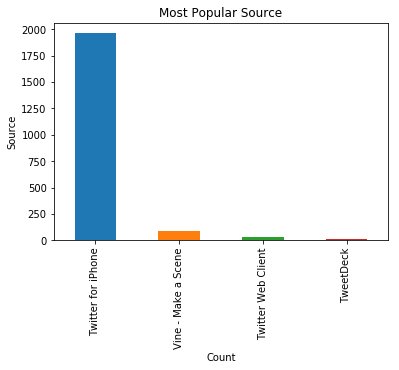

In [77]:
# plotting the Most popular source of tweets
sources.plot(kind='bar');
plt.ylabel('Source')
plt.xlabel('Count')
plt.title('Most Popular Source');


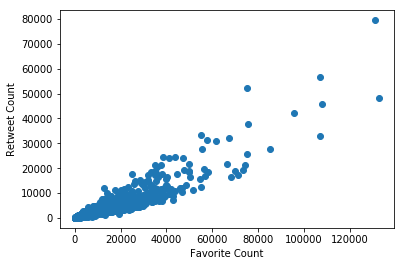

In [78]:
# plotting the Relationship between favorite and retweet counts
plt.scatter(retweet['favorite_count'], retweet['retweet_count'])
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.show()


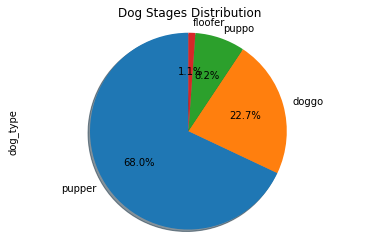

In [79]:
#plotting a pie chart showing the Popularity of dog types:
dog_type.plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('Dog Stages Distribution')
plt.show()
